# install the required libraries, run the following commands in your local machine
#conda create -n my_env_name python=3.9


#conda activate my_env_name

#pip install torch torchvision torchaudio

#pip install torch-geometric -f https://pytorch-geometric.com/whl/torch-1.13.1+cu116.html

#pip install rdflib pykeen

#pip install numpy networkx matplotlib pandas

In [1]:
import networkx as nx
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch_geometric
import torch_geometric.nn as pyg_nn
import matplotlib.pyplot as plt
from torch_geometric.datasets import Entities
from torch_geometric.utils import to_networkx

In [2]:
from rdflib import Graph, URIRef
from collections import Counter

Exploring the dataset
AIFB dataset
download the dateset

In [4]:
dataset = Entities('data/Entities', 'AIFB')
data = dataset[0]
print(f'Dataset: {dataset}')
print(f'Data: {data}\n')

print(f'Number of nodes: {data.num_nodes}')
print(f'Number of edges: {data.num_edges}')
print(f'Number of features: {dataset.num_features}')
print(f'Number of classes: {dataset.num_classes}')
print(f'Number of relations: {dataset.num_relations}')
print(f'Average node degree: {(data.num_edges) / data.num_nodes:.2f}')
print(f'Contains isolated nodes: {data.has_isolated_nodes()}')
print(f'Contains self-loops: {data.has_self_loops()}')
print(f'Is undirected: {data.is_undirected()}')

Dataset: AIFBEntities()
Data: Data(edge_index=[2, 58086], edge_type=[58086], train_idx=[140], train_y=[140], test_idx=[36], test_y=[36], num_nodes=8285)

Number of nodes: 8285
Number of edges: 58086
Number of features: 0
Number of classes: 4
Number of relations: 90
Average node degree: 7.01
Contains isolated nodes: True
Contains self-loops: False
Is undirected: True


In [5]:

# Calculating diameters is very time-consuming......
G = to_networkx(data, to_undirected=True)
connected_components = list(nx.connected_components(G))
diameters = []
for i, component in enumerate(connected_components):
    subgraph = G.subgraph(component)
    diameters.append(nx.diameter(subgraph))
print(f"Diameter: {max(diameters)} \n")

print(f'Node features: {data.x}')

Diameter: 8 

Node features: None


# Visualize the dataset 


## Use NetworkX

In [6]:
# Choose nodes for visualization
nodes = data.test_idx.numpy()[:10]
edgelist = []
typelist = []

G = nx.Graph()
for node in nodes:
    neighbors = data.edge_index[0, (data.edge_index[1] == node)].numpy()
    G.add_node(node)
    for neighbor in neighbors:
        G.add_node(neighbor)
        G.add_edge(neighbor, node)
        edgelist.append((neighbor, node))
        type = data.edge_type[torch.logical_and(data.edge_index[0] == neighbor, data.edge_index[1] == node)].numpy()
        typelist.append(type[0])


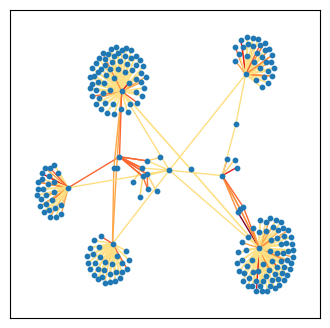

In [7]:
# Scale edge type values
scale_min, scale_max = 0.2, 1.0
colorlist = (scale_max - scale_min) / (np.max(typelist) - np.min(typelist)) * (typelist - np.min(typelist)) + scale_min

# Plot
fig, ax = plt.subplots(figsize=(4,4))
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, ax=ax, nodelist=list(G), node_size=10)
nx.draw_networkx_edges(G, pos, edgelist=edgelist, edge_color=colorlist, edge_cmap=plt.cm.YlOrRd,
                        width=1, ax=ax, edge_vmin=0, edge_vmax=1)
plt.savefig('10-node-subgraph-1.1.png', dpi=300, bbox_inches='tight')

## Read using torch

In [8]:
torch.load('./data/Entities/aifb/processed/data.pt')

({'edge_index': tensor([[   0,    0,    0,  ..., 8283, 8284, 8284],
          [ 633,  633, 1748,  ..., 7091,  576, 3710]]),
  'edge_type': tensor([ 0,  5,  2,  ...,  9, 45, 45]),
  'train_idx': tensor([ 897,  269, 1583, 4384,  885,  596, 7311, 3916, 7278, 6531, 4463, 4867,
          6353,  109, 7011, 6439, 7144, 4990, 6420, 5236, 2994, 2136, 6837, 4539,
          2773, 1487,  877, 7604, 4227, 3260,  730,  137,  274, 5729, 4422, 1910,
          7507, 5874,  586, 1897, 6862, 5720, 7452, 1872, 7948, 4161, 3632, 3414,
          8206, 2118,  356, 4700, 7326, 4441, 2304, 1021, 5142, 2638,  111, 3157,
          3195, 3468, 1200,  200, 1944,  219, 6045, 4313, 4925, 6078, 7552, 1433,
          1474, 7658, 7251, 3685, 4452,  233,  381, 2129, 6438, 4340, 8000, 6972,
          5786, 5814, 1979, 4524, 6193, 5421, 1349, 3442, 7487, 2919, 4083, 6504,
          6691, 3505, 4212, 5586, 2498, 2781, 5643, 6522,  629, 3146, 5111, 6389,
          3665, 3678, 6571, 6230, 5718,  547, 5708, 6980, 5163, 2697, 

In [9]:
len(np.unique(data.edge_type))

90

## use rdflib
## if you encounter issues to download the AIFB from Entities, use use way

In [15]:
!mkdir ./data
!wget "https://www.dropbox.com/sh/ldjd70yvnu9akxi/AAAam7SBr5KXLfjk-NVGQNWRa?dl=1" -O "./data/aifb.zip"
!unzip "data/aifb.zip" -d "data/aifb"

mkdir: cannot create directory ‘./data’: File exists
--2025-10-30 00:27:00--  https://www.dropbox.com/sh/ldjd70yvnu9akxi/AAAam7SBr5KXLfjk-NVGQNWRa?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.18, 2620:100:601c:18::a27d:612
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/scl/fo/5bkj2o1g1z5f5bv2x4lxj/ALDrm561FEhqGEoMe-qK3YY?rlkey=e7wqtjfh6gmqc5tpql5kkkkxp&dl=1 [following]
--2025-10-30 00:27:00--  https://www.dropbox.com/scl/fo/5bkj2o1g1z5f5bv2x4lxj/ALDrm561FEhqGEoMe-qK3YY?rlkey=e7wqtjfh6gmqc5tpql5kkkkxp&dl=1
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucc91cd8fa61f26fc07f414aeee6.dl.dropboxusercontent.com/zip_download_get/CXmJb6Cr5JhAt7U8CknmQm5iYLrj3g_343XD536Vcy_y_QP6_ncEwNGhR1L-ZBWNUI0TrlQfdxqndJqHe2SvPqkpDg8bLxAt4Jbu3SbYNCWzIw# [following]
--2025-10-30 00:27:01--  https://ucc91c

In [16]:
def st(node):
    """
    Maps an rdflib node to a unique string. We use str(node) for URIs (so they can be matched to the classes) and
    we use .n3() for everything else, so that different nodes don't become unified.

    Source: https://github.com/pbloem/gated-rgcn/blob/1bde7f28af8028f468349b2d760c17d5c908b58b/kgmodels/data.py#L16
    """
    # if type(node) == URIRef:
    #     return str(node)
    if isinstance(node, URIRef):
        return str(node)
    else:
        return node.n3()

g = Graph()
g.parse('./data/aifb/aifb_stripped.nt', format='nt')
data=[]
nodes = set()
relations = Counter()
for s, p, o in g:
        nodes.add(st(s))
        nodes.add(st(o))

        relations[st(p)] += 1

i2n = list(nodes) # maps indices to labels
n2i = {n:i for i, n in enumerate(i2n)} # maps labels to indices

for s, p, o in g:
    data.append([st(s), st(p), st(o)])
AIFB_df=pd.DataFrame(data, columns=['subject', 'predicate', 'object'])



In [17]:
AIFB_df

,subject,predicate,object
0,http://www.aifb.uni-karlsruhe.de/Publikationen...,http://swrc.ontoware.org/ontology#isAbout,http://www.aifb.uni-karlsruhe.de/Forschungsgeb...
1,http://www.aifb.uni-karlsruhe.de/Projekte/view...,http://swrc.ontoware.org/ontology#projectInfo,http://www.aifb.uni-karlsruhe.de/Publikationen...
2,http://www.aifb.uni-karlsruhe.de/Publikationen...,http://swrc.ontoware.org/ontology#publication,http://www.aifb.uni-karlsruhe.de/Publikationen...
3,http://www.aifb.uni-karlsruhe.de/Publikationen...,http://swrc.ontoware.org/ontology#author,http://www.aifb.uni-karlsruhe.de/Publikationen...
4,http://www.aifb.uni-karlsruhe.de/Publikationen...,http://swrc.ontoware.org/ontology#author,http://www.aifb.uni-karlsruhe.de/Personen/view...
...,...,...,...
29038,http://www.aifb.uni-karlsruhe.de/Publikationen...,http://swrc.ontoware.org/ontology#year,"""2002""^^<http://www.w3.org/2001/XMLSchema#string>"
29039,http://www.aifb.uni-karlsruhe.de/Personen/view...,http://swrc.ontoware.org/ontology#publication,http://www.aifb.uni-karlsruhe.de/Publikationen...
29040,http://www.aifb.uni-karlsruhe.de/Forschungsgeb...,http://swrc.ontoware.org/ontology#dealtWithIn,http://www.aifb.uni-karlsruhe.de/Projekte/view...
29041,http://www.aifb.uni-karlsruhe.de/Publikationen...,http://swrc.ontoware.org/ontology#year,"""2005""^^<http://www.w3.org/2001/XMLSchema#string>"


In [18]:
AIFB_df["subject_type"]=AIFB_df["subject"].apply(lambda x: str(x).split("/")[3] if str(x).startswith("http://www.aifb.") and len(str(x).split("/"))>3 else "String" )
AIFB_df["object_type"]=AIFB_df["object"].apply(lambda x: str(x).split("/")[3] if str(x).startswith("http://www.aifb.")  and len(str(x).split("/"))>3 else "String" )


In [19]:
AIFB_df

,subject,predicate,object,subject_type,object_type
0,http://www.aifb.uni-karlsruhe.de/Publikationen...,http://swrc.ontoware.org/ontology#isAbout,http://www.aifb.uni-karlsruhe.de/Forschungsgeb...,Publikationen,Forschungsgebiete
1,http://www.aifb.uni-karlsruhe.de/Projekte/view...,http://swrc.ontoware.org/ontology#projectInfo,http://www.aifb.uni-karlsruhe.de/Publikationen...,Projekte,Publikationen
2,http://www.aifb.uni-karlsruhe.de/Publikationen...,http://swrc.ontoware.org/ontology#publication,http://www.aifb.uni-karlsruhe.de/Publikationen...,Publikationen,Publikationen
3,http://www.aifb.uni-karlsruhe.de/Publikationen...,http://swrc.ontoware.org/ontology#author,http://www.aifb.uni-karlsruhe.de/Publikationen...,Publikationen,Publikationen
4,http://www.aifb.uni-karlsruhe.de/Publikationen...,http://swrc.ontoware.org/ontology#author,http://www.aifb.uni-karlsruhe.de/Personen/view...,Publikationen,Personen
...,...,...,...,...,...
29038,http://www.aifb.uni-karlsruhe.de/Publikationen...,http://swrc.ontoware.org/ontology#year,"""2002""^^<http://www.w3.org/2001/XMLSchema#string>",Publikationen,String
29039,http://www.aifb.uni-karlsruhe.de/Personen/view...,http://swrc.ontoware.org/ontology#publication,http://www.aifb.uni-karlsruhe.de/Publikationen...,Personen,Publikationen
29040,http://www.aifb.uni-karlsruhe.de/Forschungsgeb...,http://swrc.ontoware.org/ontology#dealtWithIn,http://www.aifb.uni-karlsruhe.de/Projekte/view...,Forschungsgebiete,Projekte
29041,http://www.aifb.uni-karlsruhe.de/Publikationen...,http://swrc.ontoware.org/ontology#year,"""2005""^^<http://www.w3.org/2001/XMLSchema#string>",Publikationen,String
